# 6.2: WHR Exploring Relationships

### This script contains the following points:

01. Import libraries and data
02. Consistency Checks
03. Creating a Correlation Matrix & Heatmap
04. Creating a Scatterplot
05. Creating a Pair Plot
06. Creating a Categorical Plot
07. Answer Questions from Task 6.1
08. Define any hypotheses

# 01 Import Libraries  & Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy


In [2]:
#create data path
path = r'C:\Users\fa_an\OneDrive\CareerFoundry\Tasks\Data Analytics Immersion\Tasks 6.1-6.7'

In [3]:
#WHR_all
df_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WHR_all.pkl'))

In [4]:
pd.set_option('display.max_columns', None)

# 02 Consistency Checks on df_all

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              1505 non-null   object 
 1   Year                 1505 non-null   int64  
 2   Region               1505 non-null   object 
 3   Happiness Rank       1505 non-null   int64  
 4   Happiness Score      1505 non-null   float64
 5   GDP                  1505 non-null   float64
 6   Social Support       1505 non-null   float64
 7   Life Expectancy      1505 non-null   float64
 8   Freedom              1505 non-null   float64
 9   Generosity           1505 non-null   float64
 10  Corruption           1505 non-null   float64
 11  Dystopia + Residual  1505 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 141.2+ KB


In [6]:
df_all.head()

,Country,Year,Region,Happiness Rank,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption,Dystopia + Residual
0,Afghanistan,2023,Southern Asia,137,1.859,0.645,0.000,0.087,0.000,0.093,0.059,0.975
1,Afghanistan,2017,Southern Asia,141,3.794,0.401,0.582,0.181,0.106,0.312,0.061,2.151
2,Afghanistan,2018,Southern Asia,145,3.632,0.332,0.537,0.255,0.085,0.191,0.036,2.196
3,Afghanistan,2022,Southern Asia,146,2.404,0.758,0.000,0.289,0.000,0.089,0.005,1.263
4,Afghanistan,2021,Southern Asia,149,2.523,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [7]:
df_all.tail()

,Country,Year,Region,Happiness Rank,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption,Dystopia + Residual
1500,Congo (Kinshasa),2024,Sub-Saharan Africa,139,3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.100
1501,Sierra Leone,2024,Sub-Saharan Africa,140,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.069
1502,Lesotho,2024,Sub-Saharan Africa,141,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.874
1503,Lebanon,2024,Middle East and Northern Africa,142,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073
1504,Afghanistan,2024,Southern Asia,143,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672


In [8]:
df_all.shape

(1505, 12)

In [9]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              1505 non-null   object 
 1   Year                 1505 non-null   int64  
 2   Region               1505 non-null   object 
 3   Happiness Rank       1505 non-null   int64  
 4   Happiness Score      1505 non-null   float64
 5   GDP                  1505 non-null   float64
 6   Social Support       1505 non-null   float64
 7   Life Expectancy      1505 non-null   float64
 8   Freedom              1505 non-null   float64
 9   Generosity           1505 non-null   float64
 10  Corruption           1505 non-null   float64
 11  Dystopia + Residual  1505 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 141.2+ KB


## Create data subset for analysis - use only neccessary columns

In [10]:
#create data subset by only using neccessary columns
#getting rid of happiness rank as that doesn't seem to show much correlation with it being included
df_sub = df_all.drop(['Country', 'Year', 'Region', 'Happiness Rank'], axis = 1)

In [11]:
#check df_sub header
df_sub.head()

,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption,Dystopia + Residual
0,1.859,0.645,0.000,0.087,0.000,0.093,0.059,0.975
1,3.794,0.401,0.582,0.181,0.106,0.312,0.061,2.151
2,3.632,0.332,0.537,0.255,0.085,0.191,0.036,2.196
3,2.404,0.758,0.000,0.289,0.000,0.089,0.005,1.263
4,2.523,0.370,0.000,0.126,0.000,0.122,0.010,1.895


# 03 Creating a Correlation Matrix & Heatmap

## Creating a Correlation Matrix

In [12]:
#Create a correlation matrix of df_sub variables
df_sub.corr()

,Happiness Score,GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption,Dystopia + Residual
Happiness Score,1.000000,0.710464,0.659559,0.675648,0.554102,0.080772,0.418914,0.433802
GDP,0.710464,1.000000,0.551814,0.548623,0.482697,-0.163317,0.353375,-0.141559
Social Support,0.659559,0.551814,1.000000,0.563999,0.394096,-0.000342,0.167375,-0.117501
Life Expectancy,0.675648,0.548623,0.563999,1.000000,0.242941,0.044695,0.262321,-0.001103
Freedom,0.554102,0.482697,0.394096,0.242941,1.000000,0.120412,0.423661,-0.032699
Generosity,0.080772,-0.163317,-0.000342,0.044695,0.120412,1.000000,0.212478,0.000297
Corruption,0.418914,0.353375,0.167375,0.262321,0.423661,0.212478,1.000000,-0.034416
Dystopia + Residual,0.433802,-0.141559,-0.117501,-0.001103,-0.032699,0.000297,-0.034416,1.000000


## Creating a Correlation Heatmap

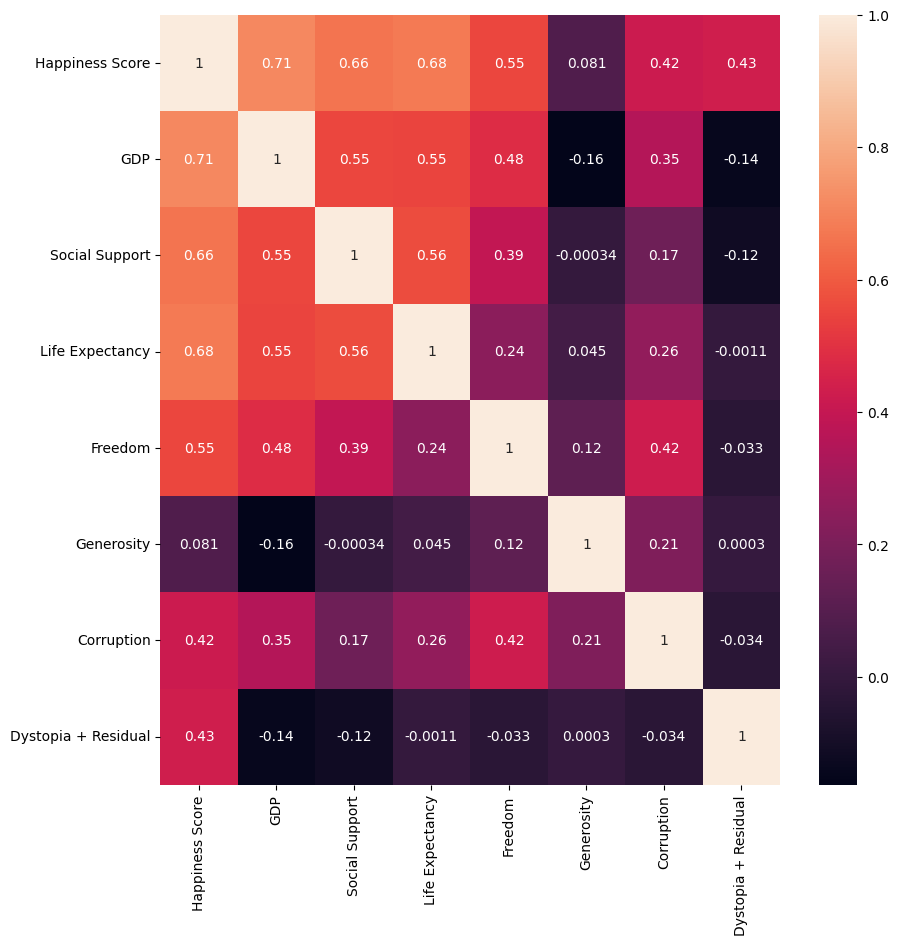

In [13]:
#create a correlation heatmap using matplotlib & seaborn of df_sub variables, adjusting figure size so y-axis has horiz. text

# create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap with seaborn
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

# Save the visualization
plt.savefig("correlation_heatmap.png", bbox_inches='tight')


## Q3. Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

The coefficients in the plot means that the strongest relationship between the variables is the Happiness Score as it's equal to 1. However, when it comes to the factors that make the real difference is GDP, it is the one that correlates the most towards the Happiness Score. I would also say, that Social Support, Life Expectancy, Freedom, and Corruption are not far behind.

The weakest relationships/lowest correlations are between all variables when paired up with Generosity and Dystopia + Residual. Apparently those don't have any relationship to those variables besides the overall Happiness Score.

# 04 Creating a Scatterplot

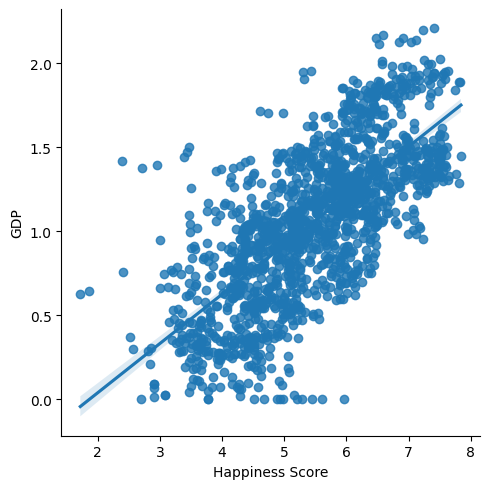

In [14]:
#create a scatterplot using df_sub: Happiness Score and GDP
sns.lmplot(x='Happiness Score', y='GDP', data = df_sub)

# Save the visualization
plt.savefig("scatterplot_score_gdp.png", bbox_inches='tight')

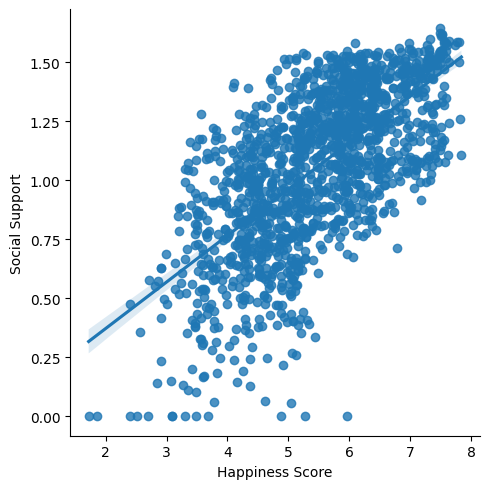

In [15]:
#create a scatterplot using df_sub: Happiness Score and Social Support
sns.lmplot(x='Happiness Score', y='Social Support', data = df_sub)

# Save the visualization
plt.savefig("scatterplot_score_social.png", bbox_inches='tight')

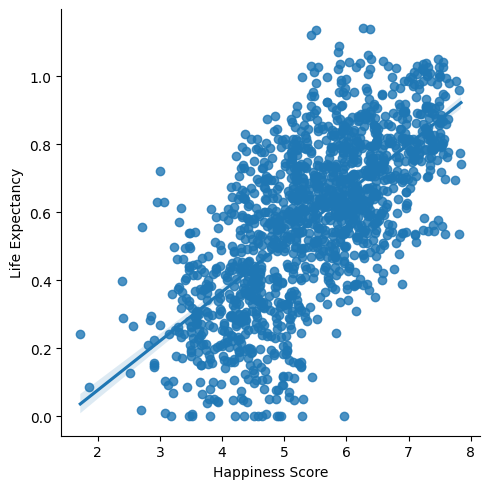

In [16]:
#create a scatterplot using df_sub: Happiness Score and Life Expectancy
sns.lmplot(x='Happiness Score', y='Life Expectancy', data = df_sub)

# Save the visualization
plt.savefig("scatterplot_score_life.png", bbox_inches='tight')

## Q4. Discuss the output of the variables with the strongest correlations.

The scatterplots exhibit a clear positive trend, with all lines sloping upwards from left to right. Additionally, numerous data points cluster closely around the regression lines. These observations suggest strong correlations and a linear relationship between the variables and the Happiness Score.

# 05 Creating a Pair Plot

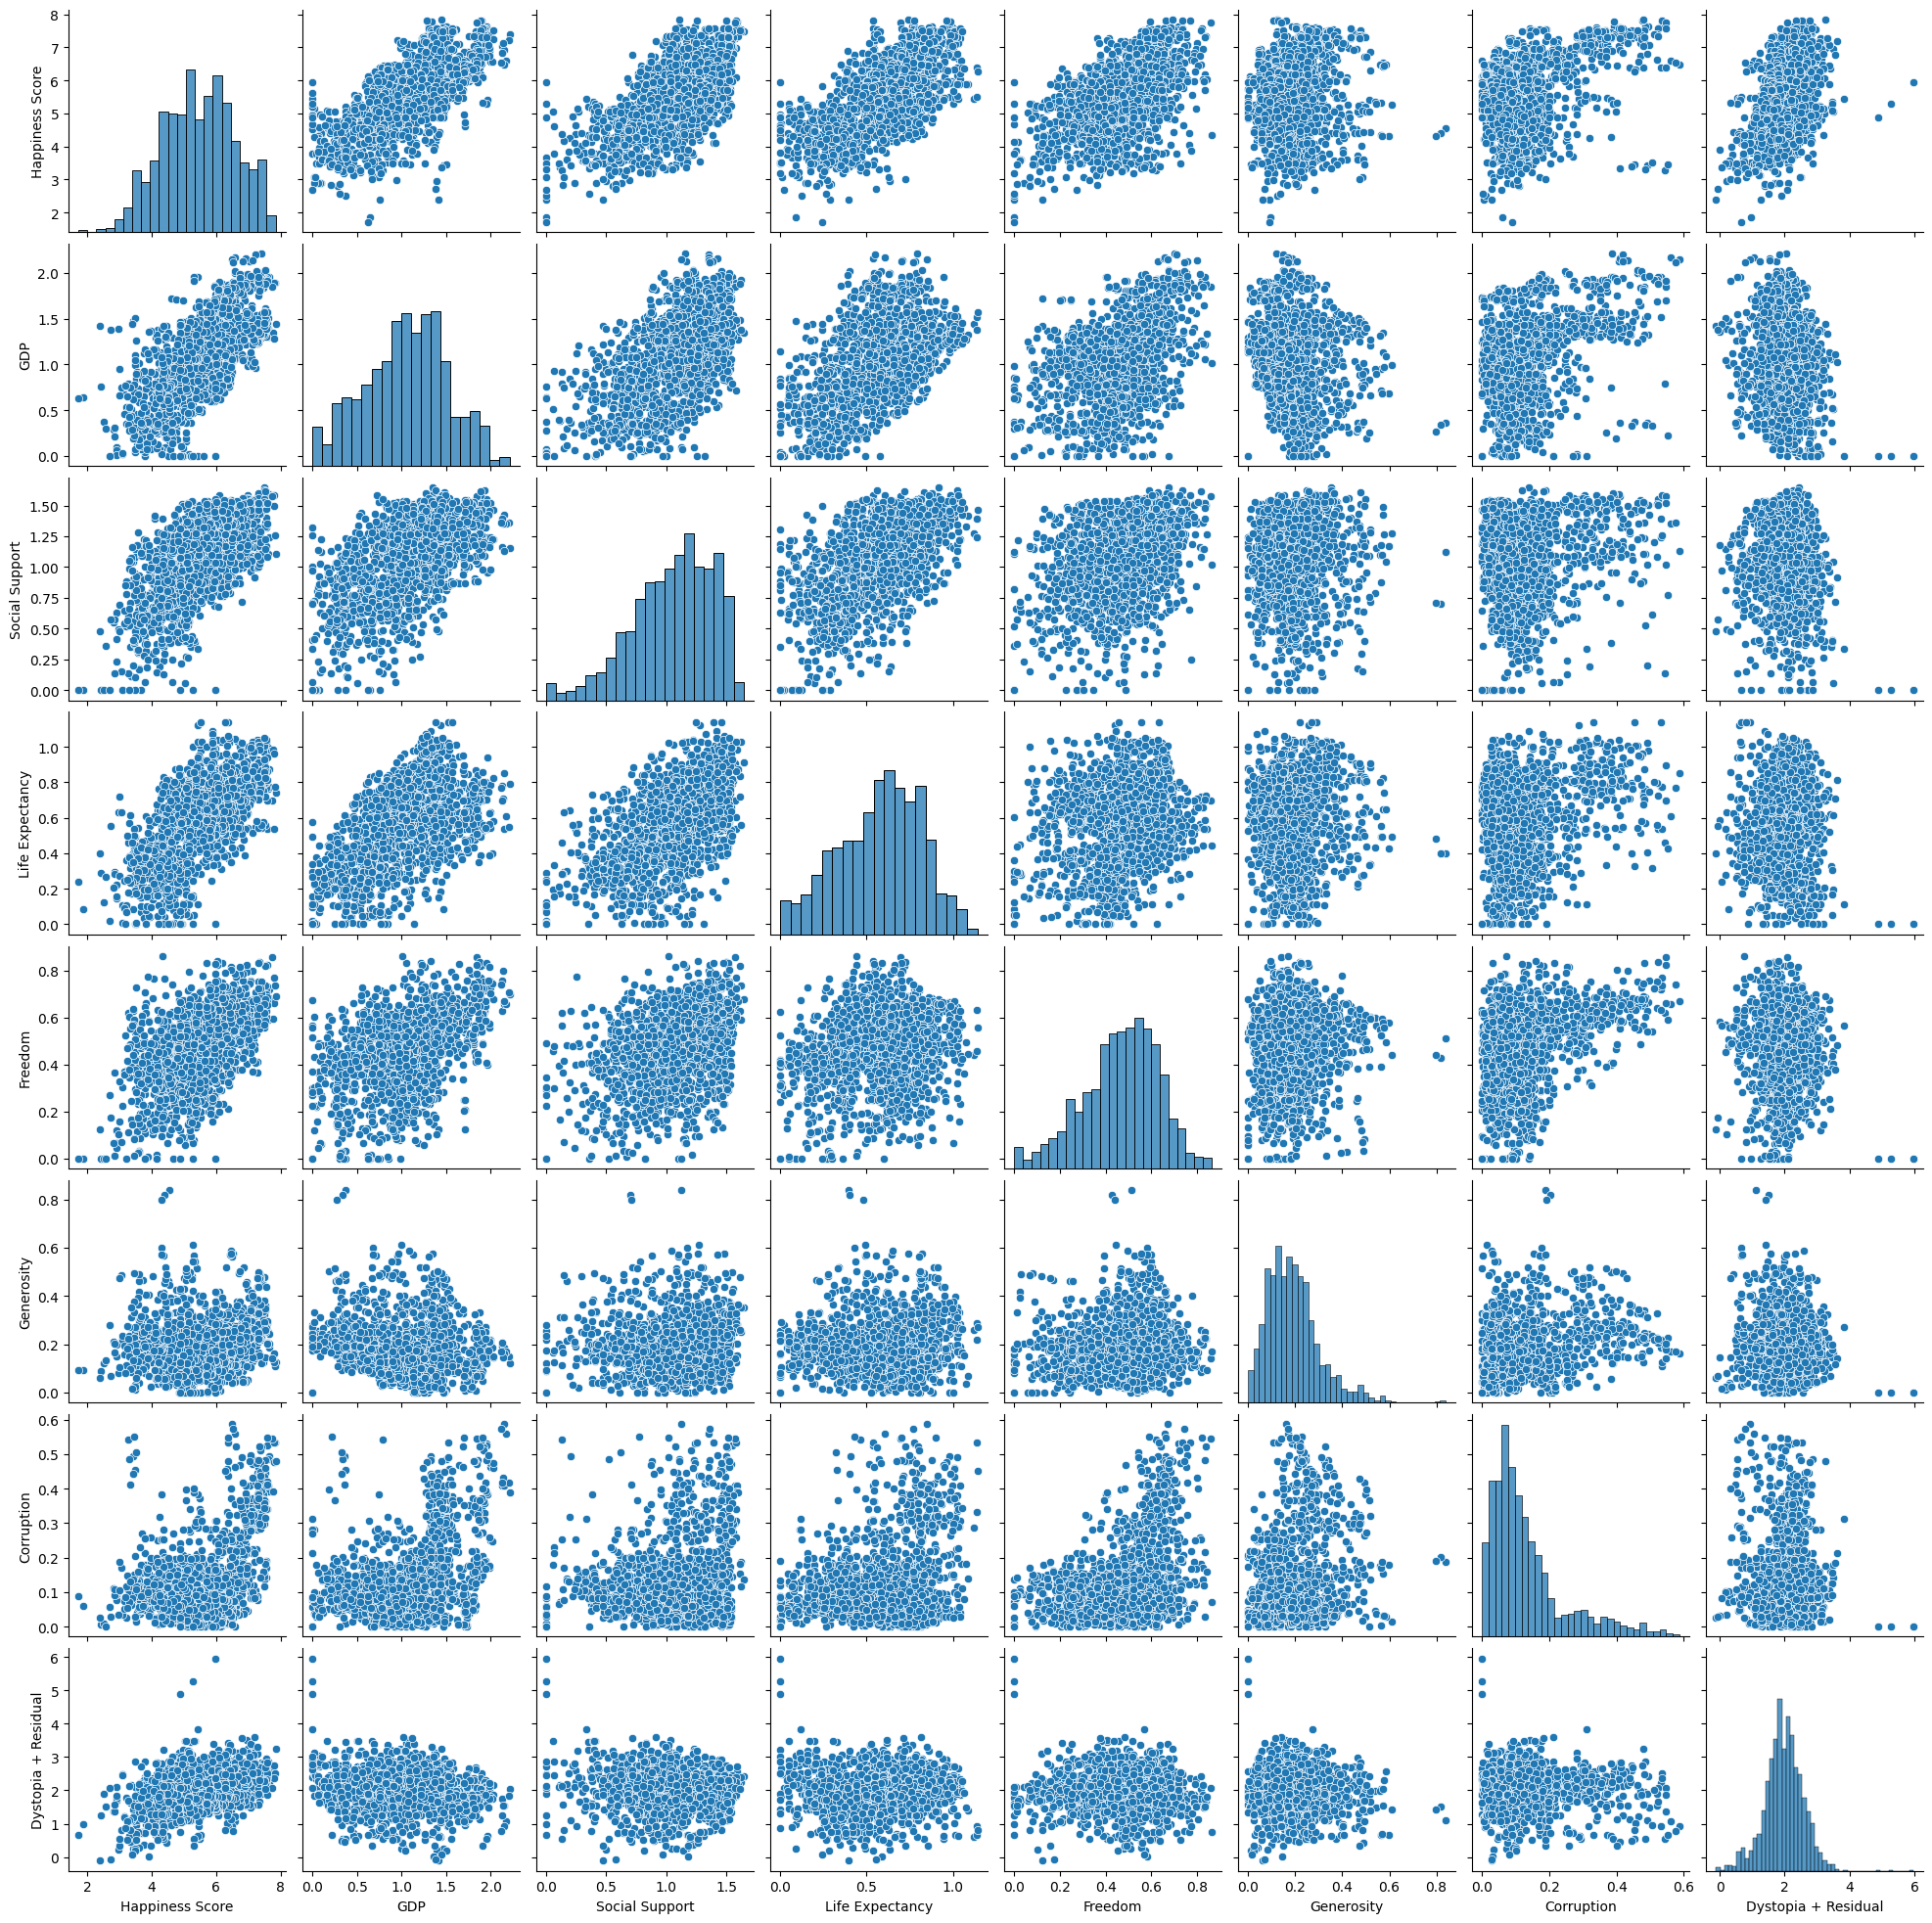

In [17]:
# create a pair plot using df_sub
g = sns.pairplot(df_sub)

# Save the visualization
plt.savefig("pair_plot.png", bbox_inches='tight')

## Q5. Comment on the distribution of the variables and mark variables you'd like to explore further with an explanation of why.

If one is looking the most evenly distributed variables in the data set (not skewed left or right) those would be: GDP and Dystopia + Residual. I'm not sure I can count Dystopia + Residual as that is really to help normalize the Happiness Scores across all countries. I say GDP is the most evenly distributed.

Freedom is slightly skewed to the left. Social Support and Life Expectancy are skewed left. Negative skewness - mode is less than than the median. Which means that although the majority of values are on the higher end of the scale and with high correlation, there could be subsets of countries with lower values. Thus, the skewed results.

Generosity and Corruption are both skewed right. Positive skewness - mode is higher than the median. Which means that although the majority of values are on the lower end of the scale and with low correlation, there could be subsets of countries with higher values. Again, the  reason for the skewed results.

All in all, although looking at correlations provide a good overview, they aren't necessarily the end all be all to seeing the true complexity of the data. I think it's more interesting, possibly, to look at why Generosity and Corruption are positively skewed. Are there any patterns or trends that are not seen with just correlation? And how can Generosity and Corruption impact the overall happiness in countries?


# 06 Creating a Categorical Plot

## Happiness Score Categorical Plot

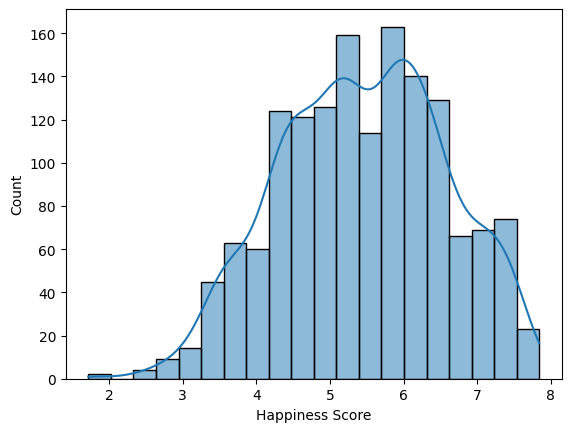

In [18]:
#create a categorical plot using df_sub and a histogram for Happiness Score
sns.histplot(df_sub['Happiness Score'], bins = 20, kde = True)

# Save the visualization
plt.savefig("categorical_plot_score.png", bbox_inches='tight')

In [19]:
#create Happiness Score categories: low, Middle, and High for scatter categorical plot
df_sub.loc[df_sub['Happiness Score'] < 4.603, 'Happiness Score category'] = 'Very Low score'

In [20]:
df_sub.loc[(df_sub['Happiness Score'] >= 4.603) & (df_sub['Happiness Score'] < 5.472), 'Happiness Score category'] = 'Low score'

In [21]:
df_sub.loc[(df_sub['Happiness Score'] >= 5.472) & (df_sub['Happiness Score'] <= 6.269), 'Happiness Score category'] = 'Middle score'

In [22]:
df_sub.loc[df_sub['Happiness Score'] > 6.269, 'Happiness Score category'] = 'High score'

In [23]:
df_sub['Happiness Score category'].value_counts(dropna = False)

Happiness Score category
Middle score      377
Very Low score    376
Low score         376
High score        376
Name: count, dtype: int64

## Happiness Score vs GDP categorical plot

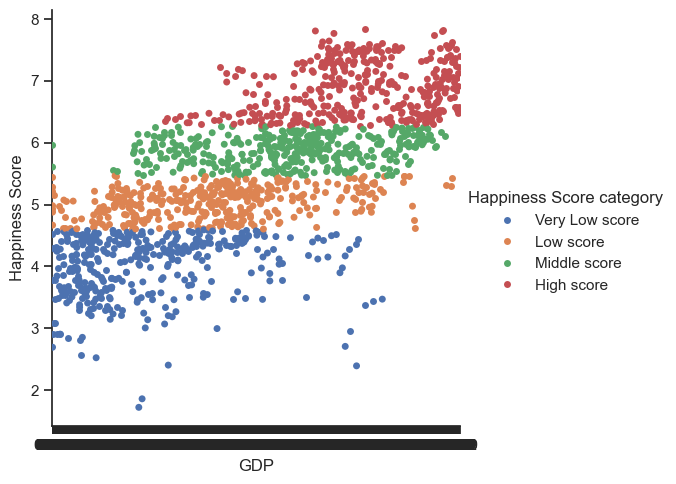

In [24]:
# Create a categorical plot in seaborn using the Happiness Score categories created v GDP (highest correlation)
sns.set(style="ticks")
g = sns.catplot(x="GDP", y="Happiness Score", hue="Happiness Score category", data=df_sub)

# Save the visualization
plt.savefig("categorical_plot_score_gdp.png", bbox_inches='tight')

## Happiness Score vs Social Support categorical plot

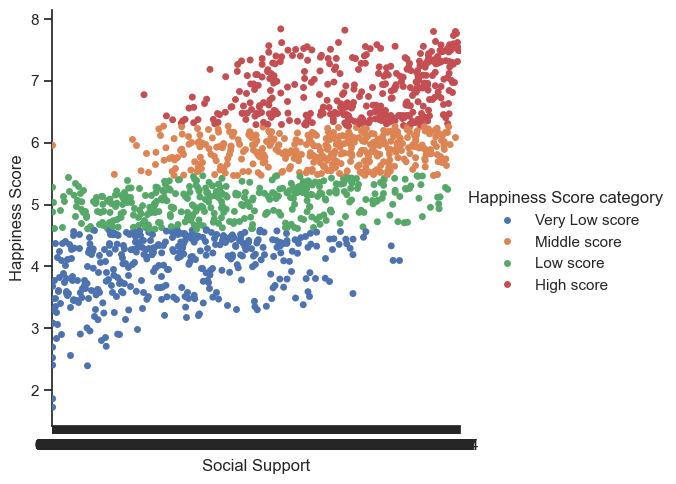

In [25]:
# Create a categorical plot in seaborn using the Happiness Score categories created vs Social Support (2nd highest correlation)
sns.set(style="ticks")
g = sns.catplot(x="Social Support", y="Happiness Score", hue="Happiness Score category", data=df_sub)

# Save the visualization
plt.savefig("categorical_plot_score_social.png", bbox_inches='tight')

## Happiness Score vs Life Expectancy categorical plot

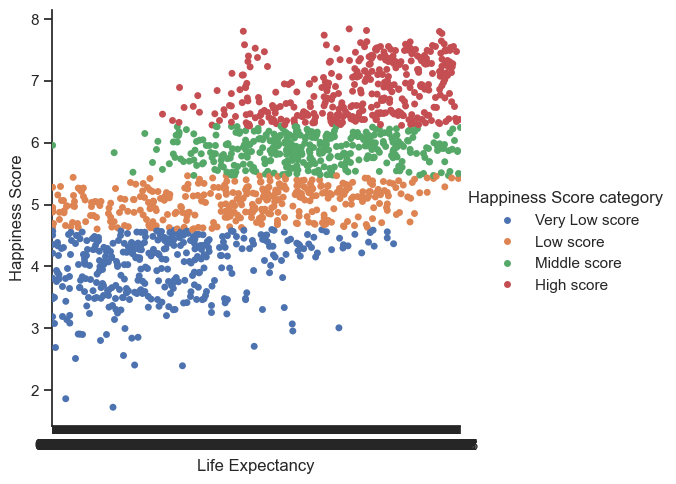

In [26]:
# Create a categorical plot in seaborn using the Happiness Score categories created vs Life Expectancy (3rd highest correlation)
sns.set(style="ticks")
g = sns.catplot(x="Life Expectancy", y="Happiness Score", hue="Happiness Score category", data=df_sub)

# Save the visualization
plt.savefig("categorical_plot_score_life.png", bbox_inches='tight')

## Happiness Score vs Generosity categorical plot

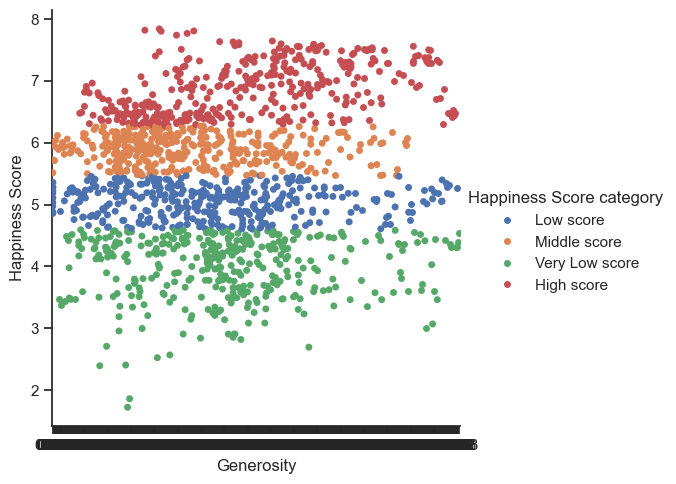

In [27]:
# Create a categorical plot in seaborn using the Happiness Score categories created vs Generosity (2nd lowest correlation)
sns.set(style="ticks")
g = sns.catplot(x="Generosity", y="Happiness Score", hue="Happiness Score category", data=df_sub)

# Save the visualization
plt.savefig("categorical_plot_score_generosity.png", bbox_inches='tight')

## Happiness Score vs Corruption categorical plot

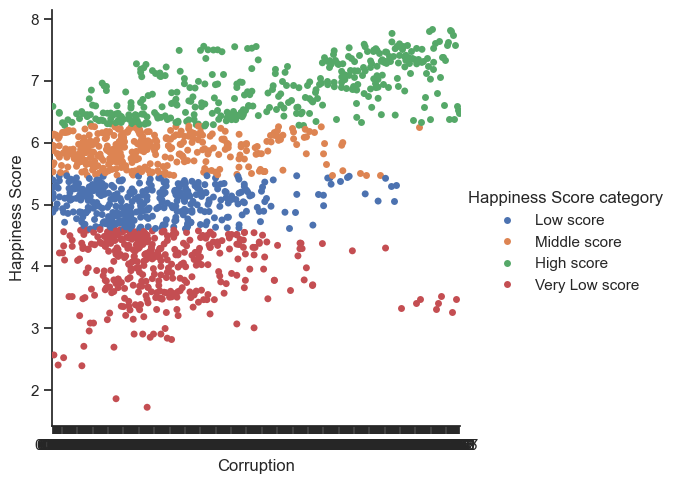

In [28]:
# Create a categorical plot in seaborn using the Happiness Score categories created vs Dystopia + Residual (lowest correlation)
sns.set(style="ticks")
g = sns.catplot(x="Corruption", y="Happiness Score", hue="Happiness Score category", data=df_sub)

# Save the visualization
plt.savefig("categorical_plot_score_corrupt.png", bbox_inches='tight')

## Q6. Interpret the results

After looking at the first categorical scatter plot using GDP v Happiness Score, I created a few more of the highest correlated variables vs the two lowest correlated variables. For the Happiness Score categories, I used the quartile range of 25, 50 and 75% to get an even distribution of the data. Doing this clearly shows a definitive line where one category starts and/or ends. I am stumped as to why the category legends are in different order and some color vs the first visualization.

With the highest correlated variables the visualizations show a more concentrated and are closely clustered together. Versus the lowest correlated variables are more spread out and not as a distinct compact shape. There are seems to be a few outliers based on the overall data for all variables. But not many. My guess is because there are a number of countries that have 0 as values for certain variables. And that will cause those results.

It will be good to continue looking at the strongest and weakest correlations as the analysis continues. Somehow I think the weakest correlations will be much more interesting, that's just a guess.

# 07 Revisit Questions

As of the exploration that was just done I can only answer one question, which is:
4. Which factor or factors contribute greatly to being happy? And that would be based on correlation, GDP, Social Support, and Life Expectancy. However, there might be other variables that don't show a high correlation that may or may not actually contribute more than expected. That's with Generosity and Corruption.

New Questions:
Do Generosity and Corruption actually contribute more to the Happiness score although they have a low correlation?
What patterns or trends have they shown in each country and/or over time?

# 08 Define any hypotheses you can at this point.

#1 Null Hypothesis: "There is no significant difference in the contributions of variables to the Happiness Score."

Alternative Hypothesis: "Happiness Score is influenced by the combined contributions of multiple variables, but the extent and direction of each variable's contribution may vary."


#2 Null Hypothesis: "There has been no significant change in the ranking of the happiest countries over time."

Alternative Hypothesis:  "There has been a significant change in the ranking of the happiest countries over time."


#3 Null Hypothesis: "There has been no significant change in the happiest regions over time."

Alternative Hypothesis:"There has been a significant change in the happiest regions over time."
